<a href="https://colab.research.google.com/github/vamsikrishna00466/Machine-learning/blob/main/Back_order_prediction_Final_version_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
Before going to the data anlysis we are creating two functions for detecting missing data
"""
## Function for detect missing data columns w.r.t rows
def missing_columns_detection(df):
  ## misssing values columns in descending order
  nan = df.isnull().sum()
  nan=nan.sort_values(ascending=False)
  print('####################\n    Missing data columns with frequency of missing rows \n####################\n',
        nan[nan>0])
  return

## Function for detecting missing data rows only
def missing_value_rows_detection(train_df):
  train_missing_data= len((train_df[pd.isnull(train_df).any(axis=1)]))
  if train_missing_data==0:
    print('This data have no missing values')
  elif train_missing_data!=0:
    print('Number of missing values(Rows):',train_missing_data)


In [3]:
"""
now we are importing the data from our google drive, our data was is csv formate, so we are using here pandas.read_csv
 for importing data.
 we have two files, one is trian data set and other one is test data set.
 we are taking two variables train_df, test_df for saving our train and test data for our analysis
"""
## extracting Data
train_df= pd.read_csv('/content/drive/MyDrive/SCA Projects/Back Order Prediction/Data/Kaggle_Training_Dataset_v2.csv')
test_df = pd.read_csv('/content/drive/MyDrive/SCA Projects/Back Order Prediction/Data/Kaggle_Test_Dataset_v2.csv')
print('Data Ectraction completed..')


Data Ectraction completed..


In [4]:
"""
After import the data we intially needs to check how the dataframe is there for basic understanding of the data,
so we are useing .head() command for seeing the top 5 rows of the data frame
"""
##head of the data
print(train_df.head())
print(test_df.head())


       sku  national_inv  lead_time  ...  stop_auto_buy  rev_stop  went_on_backorder
0  1026827           0.0        NaN  ...            Yes        No                 No
1  1043384           2.0        9.0  ...            Yes        No                 No
2  1043696           2.0        NaN  ...            Yes        No                 No
3  1043852           7.0        8.0  ...            Yes        No                 No
4  1044048           8.0        NaN  ...            Yes        No                 No

[5 rows x 23 columns]
       sku  national_inv  lead_time  ...  stop_auto_buy  rev_stop  went_on_backorder
0  3285085          62.0        NaN  ...            Yes        No                 No
1  3285131           9.0        NaN  ...             No        No                 No
2  3285358          17.0        8.0  ...            Yes        No                 No
3  3285517           9.0        2.0  ...            Yes        No                 No
4  3285608           2.0        8.0  ...  

In [5]:
"""
now we are checking number of rows and columns by using .shape command and
 column names buy using .columns of train and test data
"""
## checking the size of the data
print('Train data shape:',train_df.shape)
print('Test data shape:',test_df.shape)
print('train columns of the Data:',train_df.columns)
print('test columns of the Data:',train_df.columns)


Train data shape: (1687861, 23)
Test data shape: (242076, 23)
train columns of the Data: Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')
test columns of the Data: Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='

In [7]:
"""
we observerd in previous steps train and test data have same columns and 
last row of train and test data have no data
now i am combining train and test data for future analysis by using .append command
 and not taking last record of train and test data
"""

## comining train and test dataframe
df = train_df[:-1].append(test_df[:-1])
"""
after combine the data frames by using append index was not upated automatically
through append command, we are using .reset_index() command for resetting the index
 and deleting the old index by using del command
"""

df=df.reset_index()
del df['index']## droping index column
print('Merging train test completed')
print(df.head())

Merging train test completed
       sku  national_inv  lead_time  ...  stop_auto_buy  rev_stop  went_on_backorder
0  1026827           0.0        NaN  ...            Yes        No                 No
1  1043384           2.0        9.0  ...            Yes        No                 No
2  1043696           2.0        NaN  ...            Yes        No                 No
3  1043852           7.0        8.0  ...            Yes        No                 No
4  1044048           8.0        NaN  ...            Yes        No                 No

[5 rows x 23 columns]


In [8]:
"""
Now we are checking the data types of the features
"""
##information aboutthe data
print(df.dtypes)


sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object


In [9]:
"""
In above step we understand we have both categorical and numerical data is there for our analysis.
Now we handle missing data, for detecting missing values we already created functions
by using those functions and we detect the missing records in our data.
"""

## number of missing rows
missing_value_rows_detection(df)


Number of missing values(Rows): 115617


In [10]:
##number of missing rows with respect to columns
missing_columns_detection(df)


####################
    Missing data columns with frequency of missing rows 
####################
 lead_time    115617
dtype: int64


In [11]:
'''
In our data only lead time have missing values and other features and target variables have no
missing data, lead time is a numerical feature explaing the time diffrence between two time dependencies,
so we first do statical analysis besed on the obeservation we can go further analysis.
'''

##missing data handling
print(round(df['lead_time'].describe()))## lead time only have missing values


count    1814318.0
mean           8.0
std            7.0
min            0.0
25%            4.0
50%            8.0
75%            9.0
max           52.0
Name: lead_time, dtype: float64


In [12]:
"""
mean median, and standard deviation of the lead time is almost same, 
so i am choosing median for filling missing records in lead time feature.
"""
## filling missing values by median
def Impute_nan(data,feature,median):
    data[feature] = df[feature].fillna(median)


In [13]:
##filling missing values in leadTime by median
median_lead_time = df["lead_time"].median()
Impute_nan(df,"lead_time",median_lead_time)
print('missing values handling completed')

missing values handling completed


In [14]:
"""
After handled the missing data lets check once is there any missing data
"""
## number of missing rows
missing_value_rows_detection(df)



This data have no missing values


In [15]:
##number of missing rows with respect to columns
missing_columns_detection(df)


####################
    Missing data columns with frequency of missing rows 
####################
 Series([], dtype: int64)


In [18]:
## Handling outliers
"""
Now we don't have any missing records, next sted handling Outleirs,
for detecting outleirs we have lot methods like IQR range, standerd deviation....
we are Sperating numerical and categorical variables for handling outliers
"""
## Number of categorical_columns and their list
categorical_columns = [column for column in df.columns if df[column].dtype == 'object']
print('Cattegorical Variables:',categorical_columns)



Cattegorical Variables: ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [19]:
## Number of numerical columns and their list
numerical_columns = [column for column in df.columns if df[column].dtype != 'object']
print('Numerical Variables:',numerical_columns)

Numerical Variables: ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


In [20]:
print("Total Number of categorical features : "+str(len((categorical_columns))))
print("Total Number of numerical features : "+str(len((numerical_columns))))


Total Number of categorical features : 8
Total Number of numerical features : 15


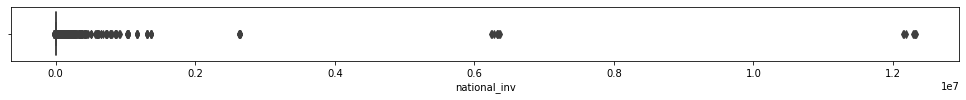

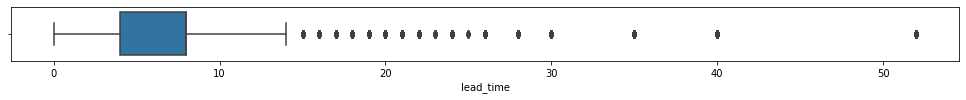

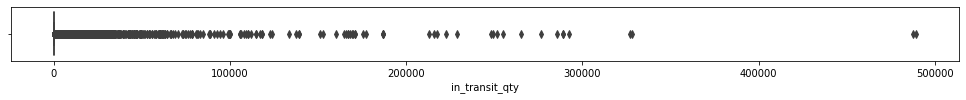

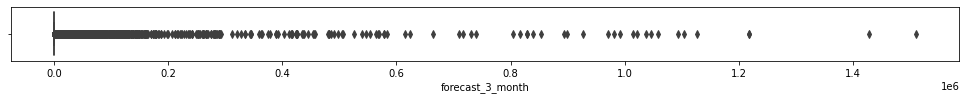

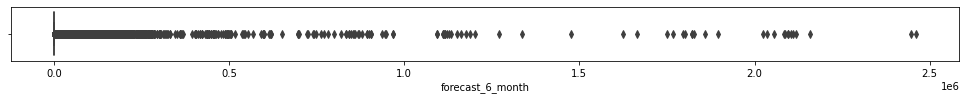

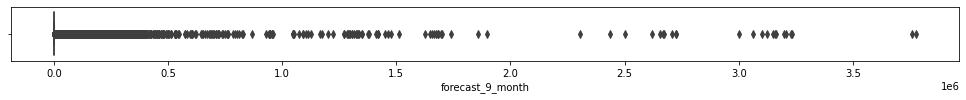

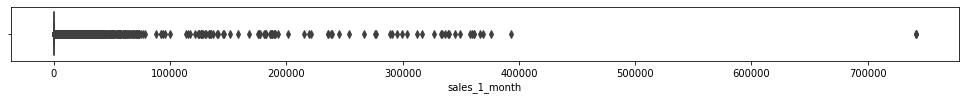

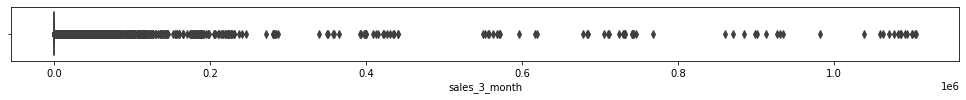

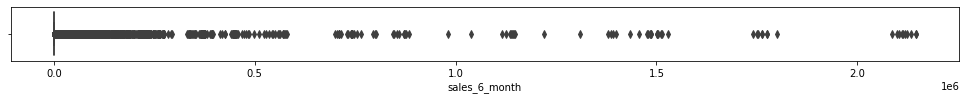

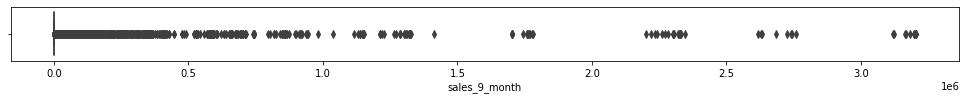

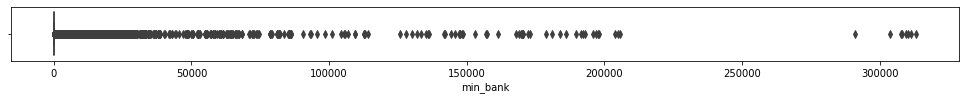

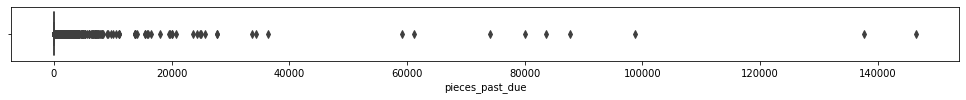

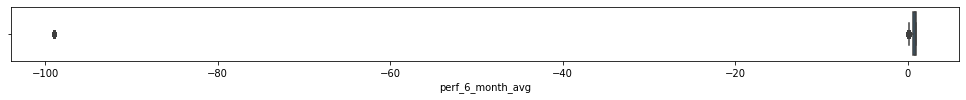

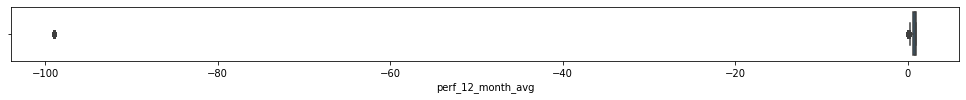

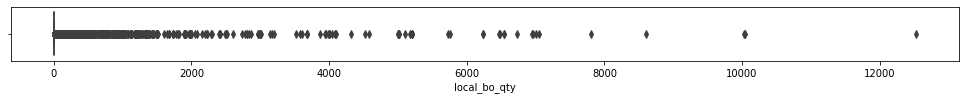

In [21]:
"""
Outliers we can able to detect by univariet or multivariete analysis
Univariete analysis: we are using Box plots for detecting outiliers
Mullticariete analysis: we are using catplot for deetcting outliers with comparing to target variable

"""
## Box plots
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

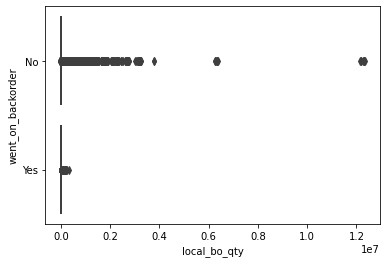

In [22]:
## Box plots with respec to tagrget variable
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        sns.boxplot(data=df1, x=column,y=df["went_on_backorder"])


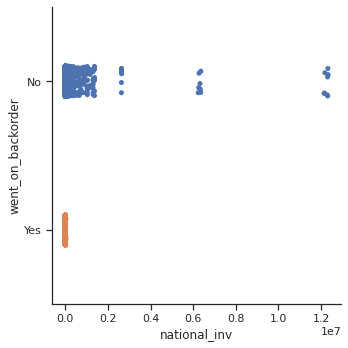

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
## multivariate outleirs detection
sns.catplot(x="national_inv", y="went_on_backorder", data=df)


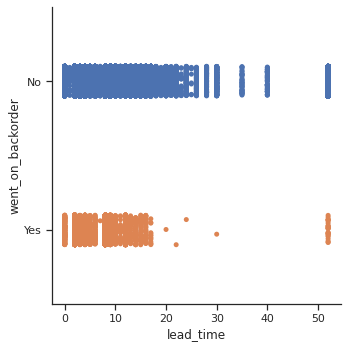

In [24]:
sns.catplot(x="lead_time", y="went_on_backorder", data=df)


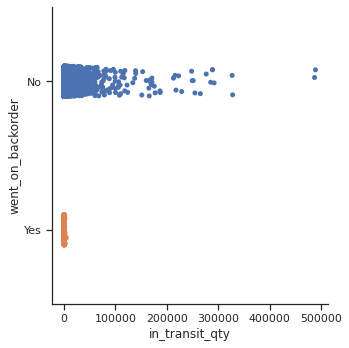

In [25]:
sns.catplot(x="in_transit_qty", y="went_on_backorder", data=df)


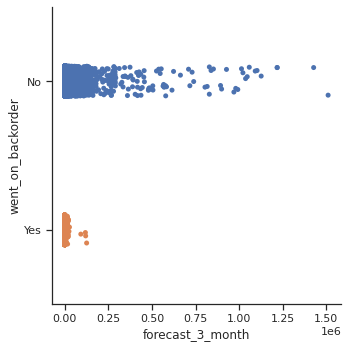

In [26]:
sns.catplot(x="forecast_3_month", y="went_on_backorder", data=df)


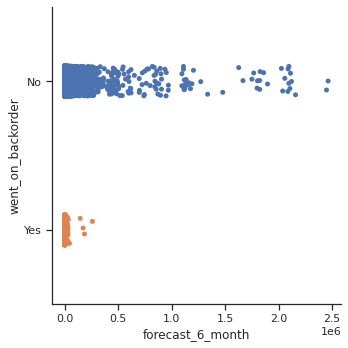

In [27]:
sns.catplot(x="forecast_6_month", y="went_on_backorder", data=df)


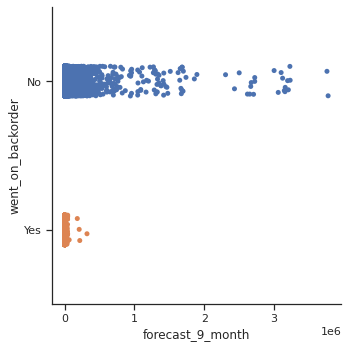

In [28]:
sns.catplot(x="forecast_9_month", y="went_on_backorder", data=df)


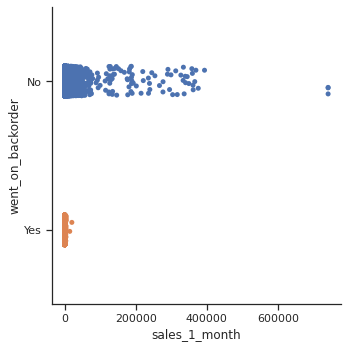

In [29]:
sns.catplot(x="sales_1_month", y="went_on_backorder", data=df)


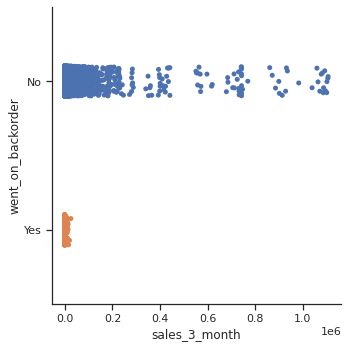

In [30]:
sns.catplot(x="sales_3_month", y="went_on_backorder", data=df)


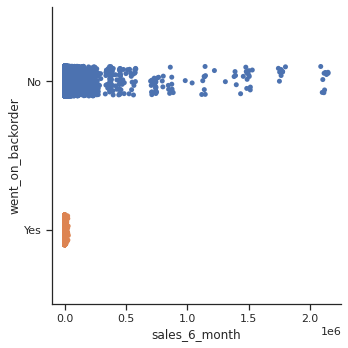

In [31]:
sns.catplot(x="sales_6_month", y="went_on_backorder", data=df)


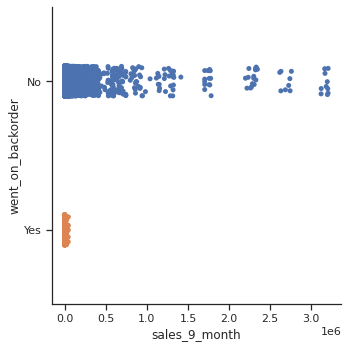

In [32]:
sns.catplot(x="sales_9_month", y="went_on_backorder", data=df)


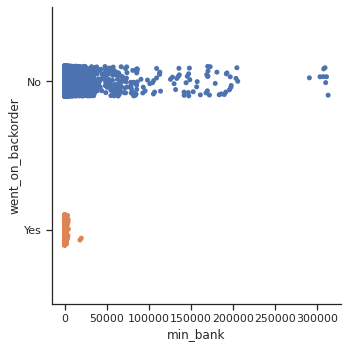

In [33]:
sns.catplot(x="min_bank", y="went_on_backorder", data=df)


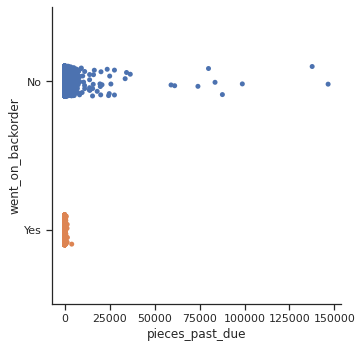

In [34]:
sns.catplot(x="pieces_past_due", y="went_on_backorder", data=df)


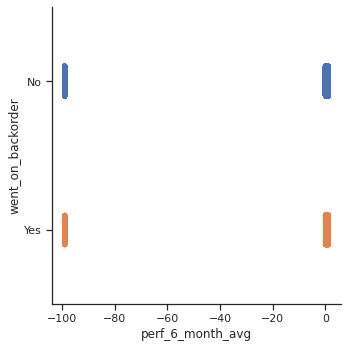

In [35]:
sns.catplot(x="perf_6_month_avg", y="went_on_backorder", data=df)


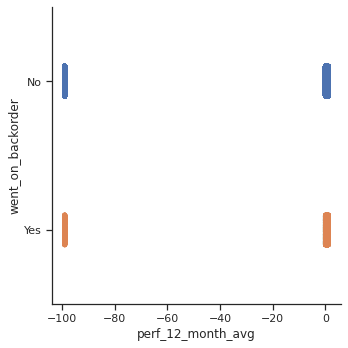

In [36]:
sns.catplot(x="perf_12_month_avg", y="went_on_backorder", data=df)


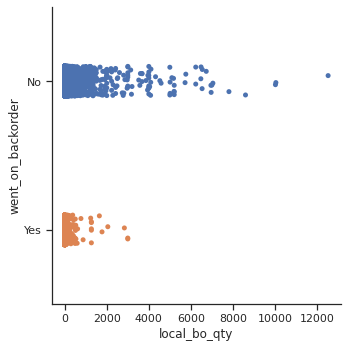

In [37]:
sns.catplot(x="local_bo_qty", y="went_on_backorder", data=df)

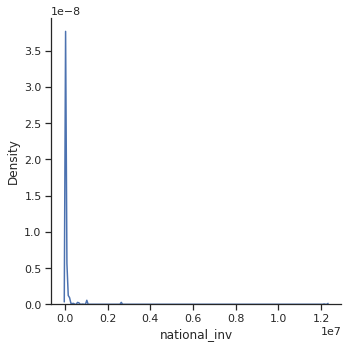

In [38]:
## ploting the distribution of the data
sns.displot(df, x="national_inv", kind="kde", cut=0)


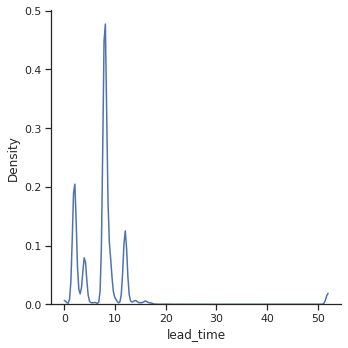

In [39]:
sns.displot(df, x="lead_time", kind="kde", cut=0)


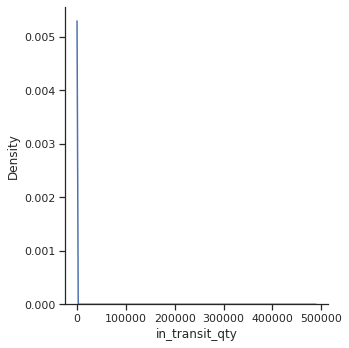

In [40]:
sns.displot(df, x="in_transit_qty", kind="kde", cut=0)


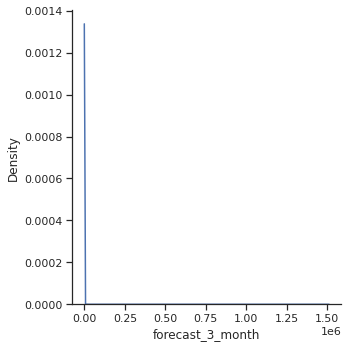

In [41]:
sns.displot(df, x="forecast_3_month", kind="kde", cut=0)


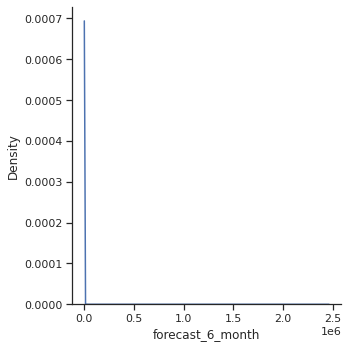

In [42]:
sns.displot(df, x="forecast_6_month", kind="kde", cut=0)


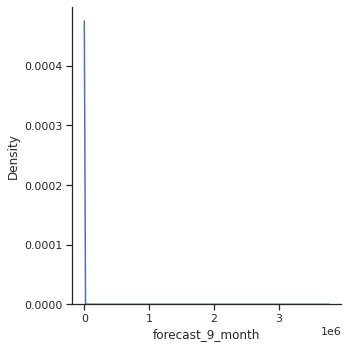

In [43]:
sns.displot(df, x="forecast_9_month", kind="kde", cut=0)


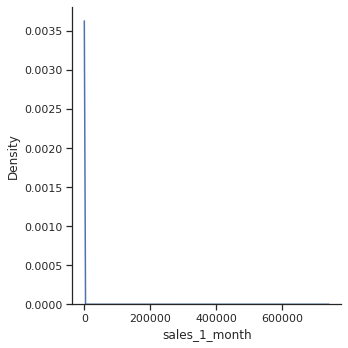

In [44]:
sns.displot(df, x="sales_1_month", kind="kde", cut=0)


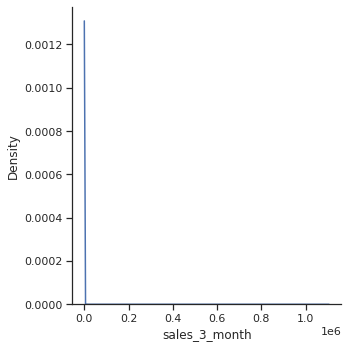

In [45]:
sns.displot(df, x="sales_3_month", kind="kde", cut=0)


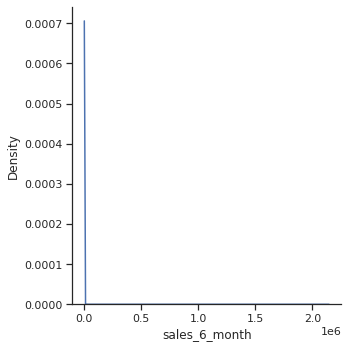

In [46]:
sns.displot(df, x="sales_6_month", kind="kde", cut=0)


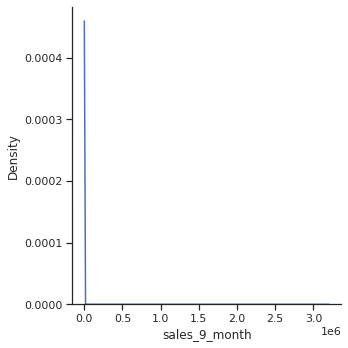

In [47]:
sns.displot(df, x="sales_9_month", kind="kde", cut=0)


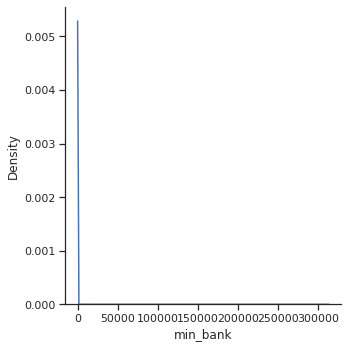

In [48]:
sns.displot(df, x="min_bank", kind="kde", cut=0)


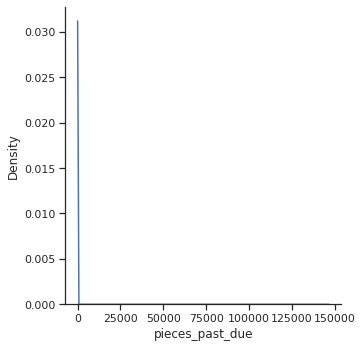

In [49]:
sns.displot(df, x="pieces_past_due", kind="kde", cut=0)


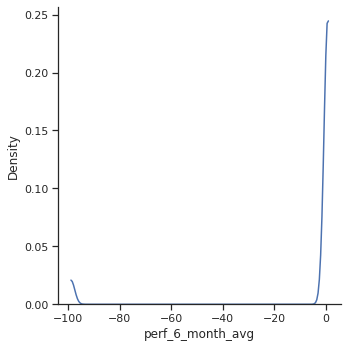

In [50]:
sns.displot(df, x="perf_6_month_avg", kind="kde", cut=0)


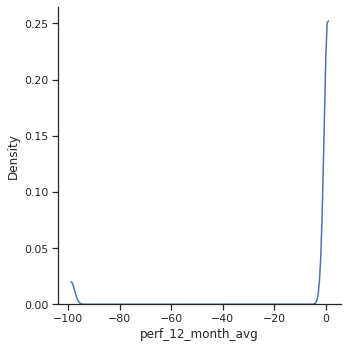

In [51]:
sns.displot(df, x="perf_12_month_avg", kind="kde", cut=0)


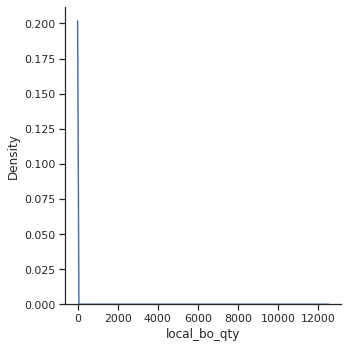

In [52]:
sns.displot(df, x="local_bo_qty", kind="kde", cut=0)


In [52]:
"""
From the above analysis, my 
understanding about the numerical data was not distributed normally and handling outleirs is verry complex task
and even we are not sure those are actual outliers or verry importent data, So i am prefer to use 
some alogorithms what are not effected by outliers in this version.
It means we are not distrubing outlier in this version, depends on the results we can 
make our decission on ouliers in our second version.
"""
### Handling categorical data
df[categorical_columns].nunique()


In [53]:
print(categorical_columns)


['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [54]:
print(df['sku'].nunique())


1929935


In [55]:
print(df['potential_issue'].value_counts())


No     1928946
Yes        989
Name: potential_issue, dtype: int64


In [56]:
print(df['deck_risk'].value_counts())


No     1494482
Yes     435453
Name: deck_risk, dtype: int64


In [57]:
print(df['oe_constraint'].value_counts())


No     1929643
Yes        292
Name: oe_constraint, dtype: int64


In [58]:
print(df['ppap_risk'].value_counts())


No     1697383
Yes     232552
Name: ppap_risk, dtype: int64


In [59]:
print(df['stop_auto_buy'].value_counts())


Yes    1859391
No       70544
Name: stop_auto_buy, dtype: int64


In [60]:
print(df['rev_stop'].value_counts())


No     1929096
Yes        839
Name: rev_stop, dtype: int64


In [61]:
print(df['went_on_backorder'].value_counts())

No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64


In [ ]:
categorical_variables = backorddf.columns[backorddf.dtypes == 'object'].to_list()
for i in [i for i in categorical_variables if i != 'sku']:
  print(i,"================>",df[i].unique())

In [62]:
## Categorical variables
categorical_column = [column for column in df.columns if df[column].dtype == 'object']


In [63]:
## count unique values in categorical data
for column in categorical_column :
    print("column ",column ,"has {} unique categories.".format(len(df[column].unique())))



column  sku has 1929935 unique categories.
column  potential_issue has 2 unique categories.
column  deck_risk has 2 unique categories.
column  oe_constraint has 2 unique categories.
column  ppap_risk has 2 unique categories.
column  stop_auto_buy has 2 unique categories.
column  rev_stop has 2 unique categories.
column  went_on_backorder has 2 unique categories.


In [64]:
"""
In our data total 8 categorical columns are there,
SKU is representing unique ID and we don't have any group wise sku's here and went_on_backorder is
target variables, we remove this two from our features we have finally 6 categorical features 
and one target variable is there.
we observed from the above step in all categeriocal features only Yes or No elements are there.
so i prefer to use binary enconding now
"""

## converting categorical data to numerical data by Binary Encoding
for col in categorical_column:
    df[col] = df[col].map({'No':0, 'Yes':1})


In [65]:
## verifying binary encoding results
print(df[categorical_column].head())



   sku  potential_issue  deck_risk  ...  stop_auto_buy  rev_stop  went_on_backorder
0  NaN                0          0  ...              1         0                  0
1  NaN                0          0  ...              1         0                  0
2  NaN                0          1  ...              1         0                  0
3  NaN                0          0  ...              1         0                  0
4  NaN                0          1  ...              1         0                  0

[5 rows x 8 columns]


In [66]:
"""
Now we are going to feature scaling step, In this version we are not doing feature selection.
"""

## using mini max scaler to narmalize the data
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()


In [67]:
"""
Before applying feature scaling we are seperating target variable and independent variables,
 and we are droping sku(sku is unique, so not usefull for our analysis) also.
"""
## seperating indipendent and dependent variables
y=df[["went_on_backorder"]]
x = df.drop(columns = ["went_on_backorder",'sku'])


In [68]:
# applying minmax scaler data
df1_minmax = pd.DataFrame(min_max.fit_transform(x),columns = x.columns)


'\n Our target variables class imbalance is there, it mean more than 9% of the data belongs to not went to back order\n and less than 1% of the data belongs to went to backorder. we have lot of methods are avialble, \nwe are using Synthetic Minority Oversampling Technique(SMOE) for handling imbalanced data.\n'

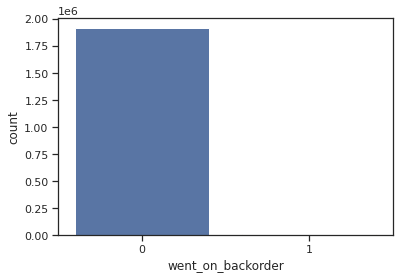

In [69]:
## handling imbalanced data
sns.countplot(y['went_on_backorder'])


In [70]:
"""
 Our target variables class imbalance is there, it mean more than 9% of the data belongs to not went to back order
 and less than 1% of the data belongs to went to backorder. we have lot of methods are avialble, 
we are using Synthetic Minority Oversampling Technique(SMOE) for handling imbalanced data.
"""
## SMOTE using for imbalced data
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state = 0)
df1_minmax , y1 = oversampler.fit_resample(df1_minmax,y)


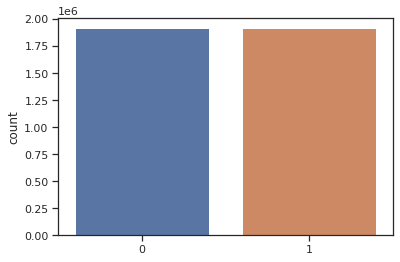

In [71]:
sns.countplot(y1)


In [72]:
"""
we sucessfully handled imbalanced data by using SMOTE oversampling metod.
"""

## saving oversampled data into new data frames
df1_minmax  = pd.DataFrame(df1_minmax,columns = x.columns)
y1  = pd.DataFrame(y1,columns = y.columns)


In [73]:
print(df1_minmax.head())
print(y1)


   national_inv  lead_time  in_transit_qty  ...  ppap_risk  stop_auto_buy  rev_stop
0      0.002205   0.153846             0.0  ...        0.0            1.0       0.0
1      0.002205   0.173077             0.0  ...        0.0            1.0       0.0
2      0.002205   0.153846             0.0  ...        0.0            1.0       0.0
3      0.002205   0.153846             0.0  ...        0.0            1.0       0.0
4      0.002206   0.153846             0.0  ...        0.0            1.0       0.0

[5 rows x 21 columns]
         went_on_backorder
0                        0
1                        0
2                        0
3                        0
4                        0
...                    ...
3831903                  1
3831904                  1
3831905                  1
3831906                  1
3831907                  1

[3831908 rows x 1 columns]


In [74]:
## Implementation of Machine Learnings Algorithms
"""
Data Preprocessing was completed sucessfully for our initial version of the project,
 now we are in the last step applying machine learning and try to predict our target variable.

Algorithum used :-

1) Navie Bayes Classifier
2) Logistic Regression
2) Support Vector Machine Classifier
3) Descission Tree Classifier
4) Random Forest Classifier
5) XGBoost Classifier
6) KNN Classifier
7) GB Classifier 
"""

## importing ml libraries
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model Performance matrix
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, classification_report



In [75]:
## spliing data into training and testing
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df1_minmax,y1,test_size = 0.33 , random_state = 300)


In [76]:
## USing Navie Bayes
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
y_pred_nb = model_nb.predict(x_test)
print("NAIVE BAYES PPERFORMANCE  --> ")
print("---"*10)
print("Train Score : ",round(model_nb.score(x_train, y_train)*100,2))
print("Test Score : ",round(model_nb.score(x_test, y_test)*100,2))
print("Confusion Matrix : " )
print(confusion_matrix(y_test, y_pred_nb))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred_nb) )
acc_nb=round(model_nb.score(x_train, y_train)*100,2)


NAIVE BAYES PPERFORMANCE  --> 
------------------------------
Train Score :  52.1
Test Score :  51.99
Confusion Matrix : 
[[ 34467 598696]
 [  8429 622938]]
ROC AUC Score :  0.5205429112939955


In [77]:
### fit the Logistic regression model
lgc=LogisticRegression()
lgc.fit(x_train,y_train)
y_pred_lgc = lgc.predict(x_test)
print("Logistic regression PPERFORMANCE  --> ")
print("---"*10)
print("Train Score : ",round(lgc.score(x_train, y_train)*100,2))
print("Test Score : ",round(lgc.score(x_test, y_test)*100,2))
print("Confusion Matrix : " )
print(confusion_matrix(y_test, y_pred_lgc))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred_lgc) )
acc_lgc=round(lgc.score(x_train, y_train)*100,2)


Logistic regression PPERFORMANCE  --> 
------------------------------
Train Score :  55.62
Test Score :  55.68
Confusion Matrix : 
[[452235 180928]
 [379521 251846]]
ROC AUC Score :  0.5565686928084956


In [78]:
### fit the SVC model
svc=LinearSVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("SVC PPERFORMANCE  --> ")
print("---"*10)
print("Train Score : ",round(svc.score(x_train, y_train)*100,2))
print("Test Score : ",round(svc.score(x_test, y_test)*100,2))
print("Confusion Matrix : " )
print(confusion_matrix(y_test, y_pred_svc))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred_svc) )
acc_svc=round(svc.score(x_train, y_train)*100,2)



SVC PPERFORMANCE  --> 
------------------------------
Train Score :  59.02
Test Score :  59.0
Confusion Matrix : 
[[302334 330829]
 [187574 443793]]
ROC AUC Score :  0.5902030148706743


In [79]:
### fit the DT model
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decesion Tree PPERFORMANCE  --> ")
print("---"*10)
print("Train Score : ",round(dt.score(x_train, y_train)*100,2))
print("Test Score : ",round(dt.score(x_test, y_test)*100,2))
print("Confusion Matrix : " )
print(confusion_matrix(y_test, y_pred_dt))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred_dt) )
acc_dt=round(dt.score(x_train, y_train)*100,2)


Decesion Tree PPERFORMANCE  --> 
------------------------------
Train Score :  96.65
Test Score :  95.85
Confusion Matrix : 
[[601316  31847]
 [ 20664 610703]]
ROC AUC Score :  0.9584863761353639


In [ ]:
### fit the RandomForestClassifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
print("RandomForestClassifier PPERFORMANCE  --> ")
print("---"*10)
print("Train Score : ",round(rfc.score(x_train, y_train)*100,2))
print("Test Score : ",round(rfc.score(x_test, y_test)*100,2))
print("Confusion Matrix : " )
print(confusion_matrix(y_test, y_pred_rfc))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred_rfc) )
acc_rfc=round(rfc.score(x_train, y_train)*100,2)


In [ ]:
### fit the AdaBoostClassifier model
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)
print("AdaBoostClassifier PPERFORMANCE  --> ")
print("---"*10)
print("Train Score : ",round(adb.score(x_train, y_train)*100,2))
print("Test Score : ",round(adb.score(x_test, y_test)*100,2))
print("Confusion Matrix : " )
print(confusion_matrix(y_test, y_pred_adb))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred_adb) )
acc_adb=round(adb.score(x_train, y_train)*100,2)

In [ ]:
### fit the xg boost classifier model
xgbc=XGBClassifier()
knc.fit(x_train,y_train)
y_pred_xgbc= xgbc.predict(x_test)
print("KNeighborsClassifier PPERFORMANCE  --> ")
print("---"*10)
print("Train Score : ",round(xgbc.score(x_train, y_train)*100,2))
print("Test Score : ",round(xgbc.score(x_test, y_test)*100,2))
print("Confusion Matrix : " )
print(confusion_matrix(y_test, y_pred_knc))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred_xgbc) )
acc_xgbc=round(xgbc.score(x_train, y_train)*100,2)

In [ ]:
### fit the KNeighborsClassifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred_knc = knc.predict(x_test)
print("KNeighborsClassifier PPERFORMANCE  --> ")
print("---"*10)
print("Train Score : ",round(knc.score(x_train, y_train)*100,2))
print("Test Score : ",round(knc.score(x_test, y_test)*100,2))
print("Confusion Matrix : " )
print(confusion_matrix(y_test, y_pred_knc))
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred_knc) )
acc_knc=round(knc.score(x_train, y_train)*100,2)
